In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches
import pickle

In [2]:
with open('data/pid_map_image_update.txt', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data = u.load()

In [3]:
data[5147]

[{'boxes': [[180, 252, 256, 455], [233, 199, 316, 421], [158, 261, 190, 371]],
  'flipped': False,
  'gt_classes': array([1, 1, 1], dtype=int32),
  'gt_overlaps': <3x2 sparse matrix of type '<class 'numpy.float32'>'
  	with 3 stored elements in Compressed Sparse Row format>,
  'gt_pids': array([5147, 1526,   -1], dtype=int32),
  'height': 600,
  'image': '/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9189.jpg',
  'max_classes': array([1, 1, 1]),
  'max_overlaps': array([1., 1., 1.], dtype=float32),
  'width': 800},
 {'boxes': [[25, 242, 146, 566],
   [418, 229, 484, 406],
   [223, 239, 270, 386],
   [436, 240, 480, 385],
   [768, 222, 796, 320],
   [748, 233, 772, 314],
   [733, 235, 757, 323],
   [716, 241, 738, 306],
   [706, 243, 718, 279]],
  'flipped': False,
  'gt_classes': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
  'gt_overlaps': <9x2 sparse matrix of type '<class 'numpy.float32'>'
  	with 9 stored elements in Compressed Sparse Row format>,
  'gt_pids'

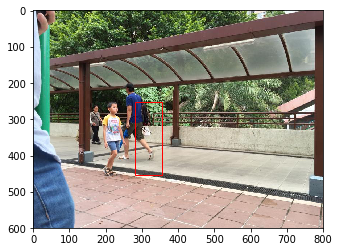

In [4]:
import cv2
bbox = np.array([[280, 252, 356, 455]])
true_bbox = np.array([[180, 252, 256, 455]])
fig,ax = plt.subplots()
img=mpimg.imread('/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9189.jpg')
ax.imshow(img)
colors= ['r','g','b','y','w','m','k','c']
for i, box in enumerate(bbox):
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor=colors[i%len(colors)],facecolor='none')
    ax.add_patch(rect)

plt.show()

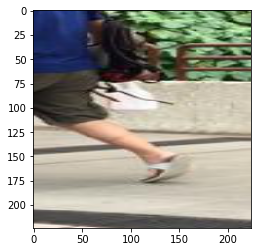

In [5]:
from PIL import Image
box = bbox[0]
img = Image.open('/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9189.jpg')
img_convert_ndarray = np.array(img)
img_convert_ndarray_3 = img_convert_ndarray[box[1]:box[3],box[0]:box[2]]
img_convert_ndarray_3 = cv2.resize(img_convert_ndarray_3, (224, 224))
plt.imshow(img_convert_ndarray_3)

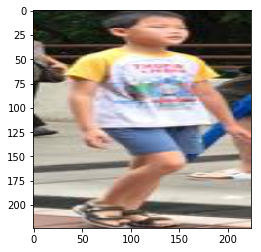

In [6]:
box = true_bbox[0]
img = Image.open('/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9189.jpg')
img_convert_ndarray = np.array(img)
img_convert_ndarray_1 = img_convert_ndarray[box[1]:box[3],box[0]:box[2]]
img_convert_ndarray_1 = cv2.resize(img_convert_ndarray_1, (224, 224))
plt.imshow(img_convert_ndarray_1)

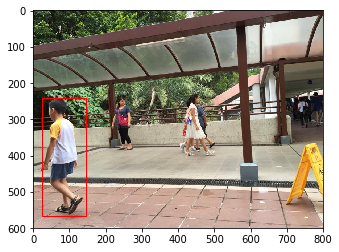

In [7]:
bbox = np.array([[25, 242, 146, 566]])
fig,ax = plt.subplots()
img=mpimg.imread('/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9190.jpg')
ax.imshow(img)
colors= ['r','g','b','y','w','m','k','c']
for i, box in enumerate(bbox):
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor=colors[i%len(colors)],facecolor='none')
    ax.add_patch(rect)

plt.show()

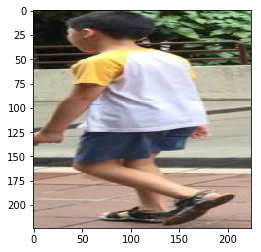

In [8]:
from PIL import Image
box = bbox[0]
img = Image.open('/home/workspace/keras-person-search/data/psdb/dataset/Image/SSM/s9190.jpg')
img_convert_ndarray = np.array(img)
img_convert_ndarray_2 = img_convert_ndarray[box[1]:box[3],box[0]:box[2]]
img_convert_ndarray_2 = cv2.resize(img_convert_ndarray_2, (224, 224))
plt.imshow(img_convert_ndarray_2)

In [9]:
from src.features import roi
from keras.applications.vgg19 import VGG19
from keras.models import Model as kerasModel
import os
os.environ['CUDA_VISIBLE_DEVICES']=''
model = VGG19(weights='imagenet' ,include_top=True)
#model = kerasModel(input=v.input, output=v.get_layer('fc2').output)
roi_1 = model.predict(np.expand_dims(img_convert_ndarray_1, axis=0))
roi_2 = model.predict(np.expand_dims(img_convert_ndarray_2, axis=0))
roi_3 = model.predict(np.expand_dims(img_convert_ndarray_3, axis=0))

Using TensorFlow backend.


In [10]:
#roi_1[0,0,0,:10],roi_2[0,0,0,:10],roi_3[0,0,0,:10]

In [11]:
def cosine(a,b):
    a = a.flatten()
    b = b.flatten()
    return a.dot(b)/(np.sqrt(np.sum(a**2))*np.sqrt(np.sum(b**2)))
# minus_roi = abs(roi_1-roi_2)
# minus_roi = minus_roi.flatten()
print(cosine(roi_1, roi_2))
#print(len(np.where(minus_roi)[0]) / minus_roi.shape[0])
# minus_roi = abs(roi_3-roi_2)
# minus_roi = minus_roi.flatten()
#print(len(np.where(minus_roi)[0]) / minus_roi.shape[0])
print(cosine(roi_3, roi_2))

0.8434587
0.1653706
